# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Dalam perdagangan internasional membutuhkan kelancaran dalam transaksi supaya tidak memerlukan waktu yang banyak. Valuta asing merupakan alat yang bisa memperlancar transaksi perdagangan internasional sehingga proses jual beli berjalan dengan lancar tanpa terkendala dengan mata uang yang dimiliki masing-masing negara. Oleh karena itu, setiap negara yang ingin bertransaksi di perdagangan internasional memerlukan kurs valuta asing.
Kurs dan valuta asing merupakan indikator atau parameter yang digunakan oleh perorangan, badan, dan negara dalam melakukan transaksi ekonomi.
Kurs salah satu istilah yang sering digunakan dalam bidang keuangan dan dikenal dengan sebutan nilai tukar (exchange rate). Menurut Kamus Besar Bahasa Indonesia (KBBI) kurs adalah nilai mata uang yang dimiliki sebuah negara yang dinyatakan dengan nilai mata uang negara yang lain.
Secara umum, kurs dapat diartikan sebagai harga nilai mata uang yang dapat diukur dengan nilai mata uang luar negeri serta bisa dibeli atau ditukar dengan mata uang lain.
Kurs mata uang yang dimiliki oleh suatu negara akan terus berubah sehingga membutuhkan sebuah alat untuk mengendalikan perubahan pada kurs mata uang negara lain dan alat itu adalah kurs valuta asing. Penggunaan kurs valuta asing tertentu pada suatu negara, maka negara tersebut bisa mengatasi atau mengendalikan nilai tukar mata uang menjadi lebih mudah.

Pada kasus ini akan membahas riwayat kurs antara Rupiah Indonesia (IDR) dan Dolar Amerika Serikat (USD) terbaru. Data kurs US Dollar ke rupiah bersumber dari website `https://www.exchange-rates.org/history/IDR/USD/T`.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    1/6/2022
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/1-6-2022">
     14,387.13904
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/1-6-2022">
     USD IDR rate for 1/6/2022
    </a>
   </td>
  </tr>
  <tr>
   <td>
    1/5/2022
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/Rate/USD/ID


Seperti yang dapat kita lihat pada hasil diatas data berada di beris dengan kunci 'td', maka akan dicari keseluruhan data menggunakan key 'td'

In [5]:
row = table.find_all('td')

Setelah didapatkan fungsi row yang berisi data scrapping akan dilihat 10 baris pertama dari row dengan menggunakan subsetting.

In [6]:
row[:10]

[<td>1/6/2022</td>,
 <td>Thursday</td>,
 <td><a href="/Rate/USD/IDR/1-6-2022">14,387.13904</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/1-6-2022">USD IDR rate for 1/6/2022</a></td>,
 <td>1/5/2022</td>,
 <td>Wednesday</td>,
 <td><a href="/Rate/USD/IDR/1-5-2022">14,376.59427</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/1-5-2022">USD IDR rate for 1/5/2022</a></td>,
 <td>1/4/2022</td>,
 <td>Tuesday</td>]

Namun terdapat suatu permasalah untuk dari dengan index 2 atau secara keseluruhan pada kolom 3, karena data yang didapat akan mengandung jenis mata uang (IDR), maka akan dilakukan subsetting untung menghilangkan kata IDR.

In [7]:
row[2].text

'14,387.13904 IDR'

In [8]:
row[2].text[:-4]

'14,387.13904'

Finding row length.

Karena pada data yang di scrap hanya ada satu key yaitu 'td', maka length data akan dibagi dengan jumlah kolom yang ada yaitu 4.

In [9]:
row = table.find_all('td')
row_length = int(len(row)/4)

In [10]:
row_length

129

Do the scrapping process here.

Pada proses scrapping akan dilakukan looping menggunakan metode for sesuai dengan range jumlah barisnya, selanjutnya masing-masing data akan diambil berdasarkan kolomnya dengan menggunakan kelipatan nya, atau biasa disebut dengan pola aritmatika karena jumlah perbedaannya selalu sama yaitu setiap 4 angka.

In [11]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process
    # Mengambil data tanggal, dimulai dari index ke 0(kolom 1) dan ditambah setiap lipatan 4 (karena ada 4 kolom)
    tanggal = row[0+(i)*4].text
    #print(tanggal)
    # Mengambil data harga harian, dimulai dari index ke 2(kolom 3) dan ditambah setiap lipatan 4 (karena ada 4 kolom)
    harga_harian = row[2+(i)*4].text[:-4]
    #print(harga_harian)
    # Menyimpan kedalam temp sebagai list
    temp.append((tanggal, harga_harian))
temp 

[('1/6/2022', '14,387.13904'),
 ('1/5/2022', '14,376.59427'),
 ('1/4/2022', '14,306.22137'),
 ('1/3/2022', '14,271.10676'),
 ('12/31/2021', '14,184.77099'),
 ('12/30/2021', '14,249.76380'),
 ('12/29/2021', '14,198.28676'),
 ('12/28/2021', '14,221.34174'),
 ('12/27/2021', '14,227.31928'),
 ('12/24/2021', '14,264.51755'),
 ('12/23/2021', '14,256.89960'),
 ('12/22/2021', '14,298.20378'),
 ('12/21/2021', '14,304.01234'),
 ('12/20/2021', '14,382.49273'),
 ('12/17/2021', '14,389.66562'),
 ('12/16/2021', '14,330.91366'),
 ('12/15/2021', '14,251.62584'),
 ('12/14/2021', '14,341.93227'),
 ('12/13/2021', '14,357.75629'),
 ('12/10/2021', '14,370.27875'),
 ('12/9/2021', '14,344.97904'),
 ('12/8/2021', '14,370.91961'),
 ('12/7/2021', '14,347.32452'),
 ('12/6/2021', '14,432.56943'),
 ('12/3/2021', '14,389.50020'),
 ('12/2/2021', '14,392.39767'),
 ('12/1/2021', '14,347.93748'),
 ('11/30/2021', '14,353.30743'),
 ('11/29/2021', '14,295.39385'),
 ('11/26/2021', '14,300.35336'),
 ('11/25/2021', '14,283.2

In [12]:
type(temp)

list

Membalikan pola data agar terurut dari data terlama hingga data terbaru.

In [13]:
temp = temp[::-1]
temp[:10]

[('7/12/2021', '14,491.59294'),
 ('7/13/2021', '14,476.52203'),
 ('7/14/2021', '14,404.17703'),
 ('7/15/2021', '14,469.95831'),
 ('7/16/2021', '14,495.41215'),
 ('7/19/2021', '14,490.12260'),
 ('7/20/2021', '14,514.10964'),
 ('7/21/2021', '14,495.34596'),
 ('7/22/2021', '14,508.09177'),
 ('7/23/2021', '14,492.63051')]

## Creating data frame & Data wrangling

Put the array into dataframe. Membuat dataframe dengan nama df.

In [14]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date', 'Daily_Price'))
df.head()

,Date,Daily_Price
0,7/12/2021,"14,491.59294"
1,7/13/2021,"14,476.52203"
2,7/14/2021,"14,404.17703"
3,7/15/2021,"14,469.95831"
4,7/16/2021,"14,495.41215"


Menghitung banyak baris dan kolom.

In [15]:
df.shape
print("Terdapat "+str(df.shape[0])+" baris dan "+str(df.shape[1])+" kolom")

Terdapat 129 baris dan 2 kolom


Cek nilai unique, agar memastikan tidak ada data duplicate.

In [16]:
df.nunique()

Date           129
Daily_Price    129
dtype: int64

In [17]:
df.duplicated().sum()

0

Tidak terdapat nilai data yang duplicate.

Do the data cleaning here 

Dengan menggunakan df.info() untuk mengecek detail dari data yang digunakan seperti tipe data dan memory yang digunakan.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         129 non-null    object
 1   Daily_Price  129 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


Merubah kolom Daily_Price menjadi data float64 dan kolom Date menjadi datetime64.

In [19]:
df['Daily_Price'] = df['Daily_Price'].str.replace(",","")
df['Daily_Price'] = df['Daily_Price'].astype('float64')
df['Date'] = df['Date'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         129 non-null    datetime64[ns]
 1   Daily_Price  129 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.1 KB


Okee sekarang data sudah sesuai, selanjutnya membuat kolom Date sebagai index dari data. Namun sebelum itu akan dilakukan penyesuaian karena data yang didapat masih memiliki tanggal yang dilewat (mungkin karena hari libur sehingga tidak dicatat).

In [20]:
#Tanggal
awal = df['Date'].min() # tanggal awal/terlama
akhir = df['Date'].max() # tanggal akhir/terbaru
print("Data mulai dari "+str(awal)+" hingga "+str(akhir))

Data mulai dari 2021-07-12 00:00:00 hingga 2022-01-06 00:00:00


In [21]:
pd.date_range(start=awal, end=akhir)

DatetimeIndex(['2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15',
               '2021-07-16', '2021-07-17', '2021-07-18', '2021-07-19',
               '2021-07-20', '2021-07-21',
               ...
               '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31',
               '2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06'],
              dtype='datetime64[ns]', length=179, freq='D')

Selanjutnya membuat kolom Date sebagai index dari data.

In [22]:
df = df.set_index('Date')
df.head(10)

,Daily_Price
Date,
2021-07-12,14491.59294
2021-07-13,14476.52203
2021-07-14,14404.17703
2021-07-15,14469.95831
2021-07-16,14495.41215
2021-07-19,14490.12260
2021-07-20,14514.10964
2021-07-21,14495.34596
2021-07-22,14508.09177


Selanjutnya index Date akan digantikan dengan index Date yang baru untuk mengisi tanggal yang dilewat.

In [23]:
kurs = df
index_date = pd.date_range(start=awal, end=akhir)
kurs = kurs.reindex(index_date)
kurs.head(10)

,Daily_Price
2021-07-12,14491.59294
2021-07-13,14476.52203
2021-07-14,14404.17703
2021-07-15,14469.95831
2021-07-16,14495.41215
2021-07-17,NaN
2021-07-18,NaN
2021-07-19,14490.12260
2021-07-20,14514.10964
2021-07-21,14495.34596


Karena memasukan tanggal baru, selanjutnya saya akan mengecek berapakah barir yang kosong (NaN). Kemudian saya memasukan nilai yang kosong (NaN) dengan nilai harga pada tanggal sebelumnya.

In [24]:
kurs.isna().sum()

Daily_Price    50
dtype: int64

In [25]:
kurs = kurs.fillna(method='ffill')
kurs.head(10)

,Daily_Price
2021-07-12,14491.59294
2021-07-13,14476.52203
2021-07-14,14404.17703
2021-07-15,14469.95831
2021-07-16,14495.41215
2021-07-17,14495.41215
2021-07-18,14495.41215
2021-07-19,14490.12260
2021-07-20,14514.10964
2021-07-21,14495.34596


Sip, data yang kosong (NaN) sudah terisi. Dari sini kita sudah bisa memulai untuk mengolah datanya.

## Data visualisation
Pada data visualisation saya akan membuat plot garis untuk melihat trend dan perubahan nilai kurs antara Indonesia (IDR) dan Dolar Amerika Serikat (USD).

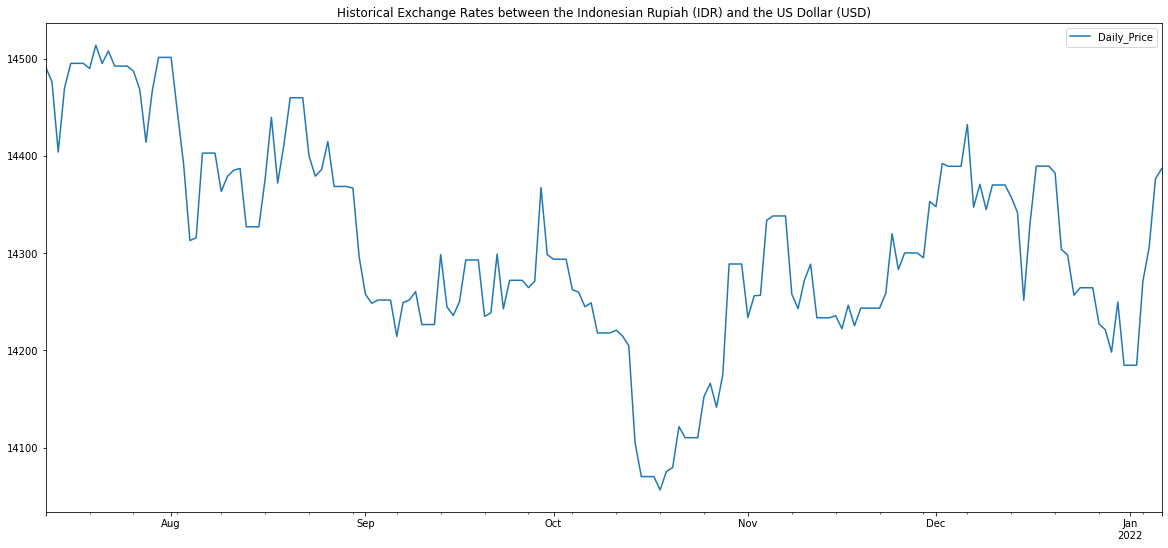

In [26]:
kurs.plot(title="Historical Exchange Rates between the Indonesian Rupiah (IDR) and the US Dollar (USD)", figsize=(20,9));

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

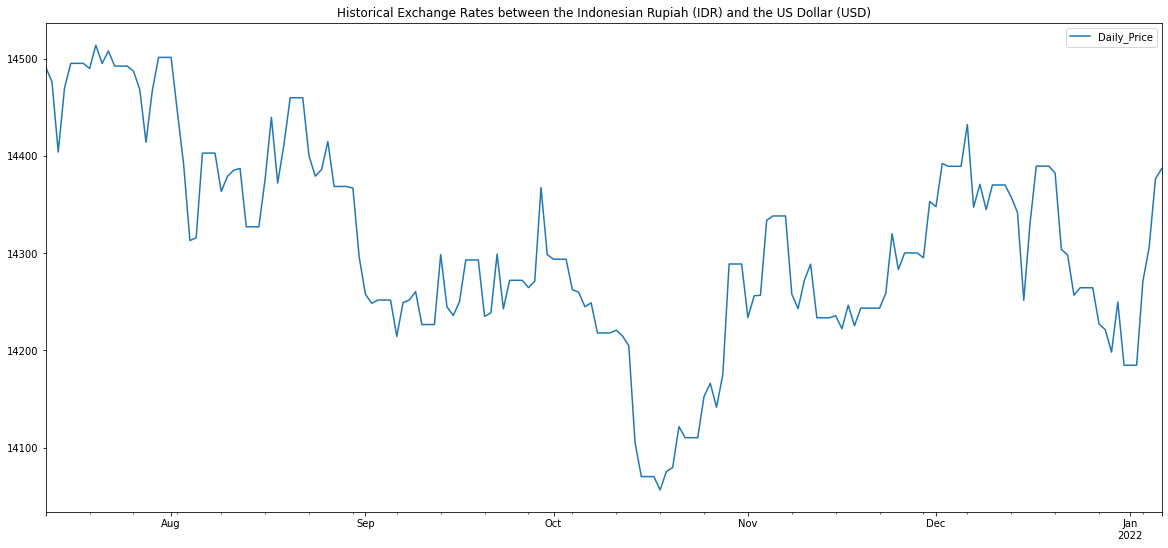

In [27]:
kurs.plot(title="Historical Exchange Rates between the Indonesian Rupiah (IDR) and the US Dollar (USD)", figsize=(20,9));

## Kesimpulan
- Data dari "Historical Exchange Rates between the Indonesian Rupiah (IDR) and the US Dollar (USD)" mengalami fluktuasi yang  beragam dan sulit untuk melihat pola bulanan maupun pola keseluruhannya.
- Dari hasil plot diatas, dapat kita simpulkan bahwa nilai Kurs terendah berada pada akhir oktober/awal november, hal ini dapat terlihat dari plot yang mengalami penurunan. (Tepatnya:2021-10-18, cek pada Tambahan)
- Nilai kurs tertinggi berada pada awal plot, atau sekitar bulan Juli hingga Agustus. (Tepatnya:2021-07-20, cek pada Tambahan)

In [28]:
#Tambahan
NilaiTerendah = kurs[kurs["Daily_Price"] == kurs["Daily_Price"].min()]
NilaiTerendah

,Daily_Price
2021-10-18,14056.43762


In [29]:
#Tambahan
NilaiTertinggi = kurs[kurs["Daily_Price"] == kurs["Daily_Price"].max()]
NilaiTertinggi

,Daily_Price
2021-07-20,14514.10964


### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.